In [ ]:
channel_name = "Jelly"

In [ ]:
FEA  = 'title' #@param ["title", "tags"]

### Pre-processing and NLP implementation

---



---



In [ ]:
import numpy as np
import pandas as pd

loaded_data  =  pd.read_csv(channel_name+".csv")
print("Number of Videos before dropping: ",loaded_data.shape[0])

# Drop NaN values
loaded_data.dropna()
print("Number of Videos after dropping: ",loaded_data.shape[0])

# Drop Unamed Column
loaded_data = loaded_data.loc[:, ~loaded_data.columns.str.contains('^Unnamed')]

# Drop Columns
loaded_data = loaded_data.drop(['release_date', 'duration','age_in_days'], axis = 1)

loaded_data.head()

Number of Videos before dropping:  212
Number of Videos after dropping:  212


,title,views,tags
0,Digging STRAIGHT UP in the NEW MINECRAFT UPDATE…,56378,"child friendly, kid friendly, minecraft, updat..."
1,"I Played HAPPY WHEELS in 2021, and it's AMAZING!",234008,"child friendly, kid friendly, jelly, happy whe..."
2,Attempting A LASER BEDROCK Dropper in Minecraft…,273716,"child friendly, kid friendly, minecraft, dropp..."
3,FINISH Without Touching ANY ARROWS! (Ultimate ...,243326,"child friendly, kid friendly, ultimate chicken..."
4,Minecraft But There are CUSTOM ITEMS...,309534,"child friendly, kid friendly, minecraft, new i..."


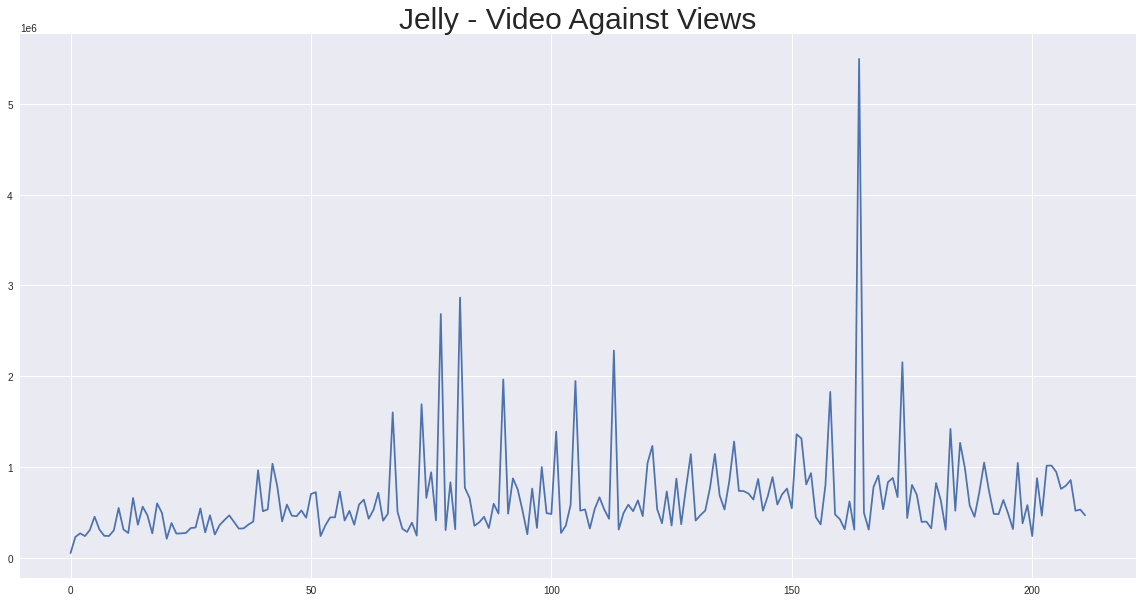

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

x_plot_data = [i for i in range(loaded_data.shape[0])]
y_plot_data = loaded_data['views']

plt.figure(figsize=(20,10))
plt.plot(x_plot_data,y_plot_data)
plt.title(channel_name + " - Video Against Views",fontsize=30)

plt.savefig(channel_name + "VideoAgainstViews.jpg")
plt.show()

In [ ]:
%%capture
!pip install nltk
!pip install contractions

import numpy as np
import pandas as pd

import contractions
import re

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk import WordNetLemmatizer
nltk.download('wordnet')
lemma = WordNetLemmatizer()

In [ ]:
def apply_NLP(x):
  # Expand Contractions
  x = contractions.fix(x)
  # Convert to Lower Case
  x = x.lower()
  # Remove Numbers
  x = re.sub(r'\d+','',x)
  #Remove Punct
  x = re.sub(r'[^\w\s]', '', x)
  # Tokenize
  x = word_tokenize(x)
  # Remove Stopwords
  x = [w for w in x if not w in stopwords.words()]
  # Lemmatize
  x = [ lemma.lemmatize(w, pos = "v") for w in x]
  x = [ lemma.lemmatize(w, pos = "n") for w in x]
  # Final Sentence
  for i in x:
    if(len(i)==1):
      x.remove(i)
  x = ' '.join(x)
  return x

In [ ]:
loaded_data[FEA] = loaded_data[FEA].apply(apply_NLP)
print("Number of Videos: ",loaded_data.shape[0])
loaded_data

Number of Videos:  212


,title,views,release_date,tags,duration,age_in_days
0,dig straight new minecraft update,56378,2021-12-24,"child friendly, kid friendly, minecraft, updat...",11:11,0
1,play happy wheel amaze,234008,2021-12-23,"child friendly, kid friendly, jelly, happy whe...",10:48,1
2,attempt laser bedrock dropper minecraft,273716,2021-12-23,"child friendly, kid friendly, minecraft, dropp...",11:27,1
3,finish without touch arrow ultimate chicken horse,243326,2021-12-22,"child friendly, kid friendly, ultimate chicken...",13:23,2
4,minecraft custom item,309534,2021-12-22,"child friendly, kid friendly, minecraft, new i...",9:52,2
...,...,...,...,...,...,...
207,troll friend castle tnt minecraft hardcore sur...,797938,2021-09-09,"child friendly, family friendly, kid friendly,...",9:38,106
208,minecraft bodybuilder hunter challenge manhunt,860159,2021-09-09,"child friendly, family friendly, kid friendly,...",15:5,106
209,first get hit ball lose pico park,522354,2021-09-08,"child friendly, family friendly, kid friendly,...",8:13,107
210,floor lava lucky block challenge minecraft,534797,2021-09-08,"child friendly, family friendly, kid friendly,...",11:49,107


### Generating Network

---



---



In [ ]:
import networkx as nx
G = nx.Graph()

for i in range(loaded_data.shape[0]):
  G.add_node(i,BOW=loaded_data[FEA][i],Views = loaded_data['views'][i])

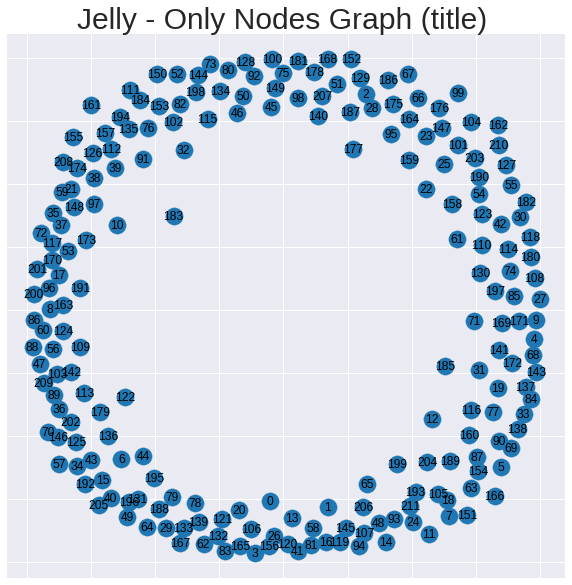

In [ ]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(G, k=0.6, iterations=20)
nx.draw_networkx(G, pos, with_labels=True)

plt.title(channel_name + " - Only Nodes Graph (" + FEA+ ") ",fontsize=30)
plt.savefig(channel_name + "Nwk 1 (" + FEA + ").jpg")
plt.show()

In [ ]:
def get_common(x,y):
  x = x.split(" ")
  y = y.split(" ")
  return len(list(set(x)&set(y)))

In [ ]:
for i in range(loaded_data.shape[0]):
  for j in range(loaded_data.shape[0]):
    if(i!=j):
      t = get_common(loaded_data[FEA][i],loaded_data[FEA][j])
      if(t!=0):
        G.add_edge(i,j,weight=t)

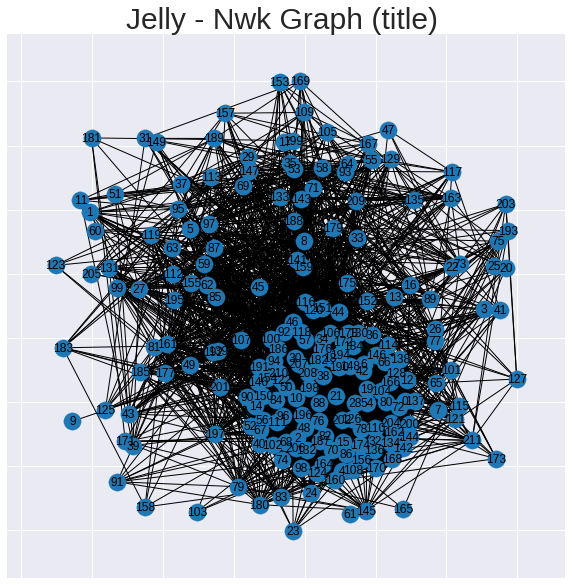

In [ ]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(G, k=0.6, iterations=20)
nx.draw_networkx(G, pos, with_labels=True)

plt.title(channel_name + " - Nwk Graph ("+FEA+") ",fontsize=30)

plt.savefig(channel_name + "Nwk 2 ("+FEA+").jpg")
plt.show()

### Clustering Algorithms Implemented


---



---



In [ ]:
# Get initial Matrix 
size = loaded_data.shape[0]
M = np.zeros((size,size))

for i in range(size):
  for j in range(size):
    t = get_common(loaded_data[FEA][i],loaded_data[FEA][j])
    M[i][j] = t

# Normalize the Matrix
fractional_row = M[0]/np.max(M[0])

for a in range(1,np.shape(M)[0]):
  temp = M[a]/np.max(M[a])
  fractional_row = np.vstack((fractional_row,temp))

M = fractional_row
np.fill_diagonal(M,0)
empty_diag = M

#### 0. KMeans Algorithm

In [ ]:
import time
begin = time.time()

from sklearn.cluster import KMeans
k_cluster = 4
KM = KMeans(k_cluster)
KM.fit(M)
KM_Results = KM .labels_

KM_classes = [[] for i in range(k_cluster)]
for i in range(KM_Results.shape[0]):
  v = KM_Results[i]
  KM_classes[v].append(i)

for i in range(len(KM_classes)):
  print("Class ",i," -- ",KM_classes[i])

end = time.time()
time_KMeans = end-begin

Class  0  --  [0, 2, 6, 10, 15, 18, 19, 21, 30, 32, 34, 38, 40, 42, 44, 46, 50, 54, 56, 57, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 88, 90, 92, 96, 100, 102, 106, 108, 110, 111, 116, 118, 120, 122, 130, 132, 136, 144, 148, 154, 156, 162, 166, 168, 170, 176, 178, 182, 186, 187, 191, 194, 196, 198, 200, 202, 206, 207, 208, 210]
Class  1  --  [5, 35, 53, 58, 71, 73, 89, 97, 129, 133, 135, 141, 143, 147, 151, 152, 163, 192]
Class  2  --  [4, 12, 14, 28, 36, 48, 52, 86, 94, 98, 104, 114, 124, 126, 128, 134, 137, 138, 140, 142, 146, 150, 160, 164, 172, 174, 184, 190, 204]
Class  3  --  [1, 3, 7, 8, 9, 11, 13, 16, 17, 20, 22, 23, 24, 25, 26, 27, 29, 31, 33, 37, 39, 41, 43, 45, 47, 49, 51, 55, 59, 60, 61, 62, 63, 64, 65, 67, 69, 75, 77, 79, 81, 83, 85, 87, 91, 93, 95, 99, 101, 103, 105, 107, 109, 112, 113, 115, 117, 119, 121, 123, 125, 127, 131, 139, 145, 149, 153, 155, 157, 158, 159, 161, 165, 167, 169, 171, 173, 175, 177, 179, 180, 181, 183, 185, 188, 189, 193, 195, 197, 199, 201, 203, 205, 

Colors Choosen are:  ['brown', 'red', 'green', 'purple']


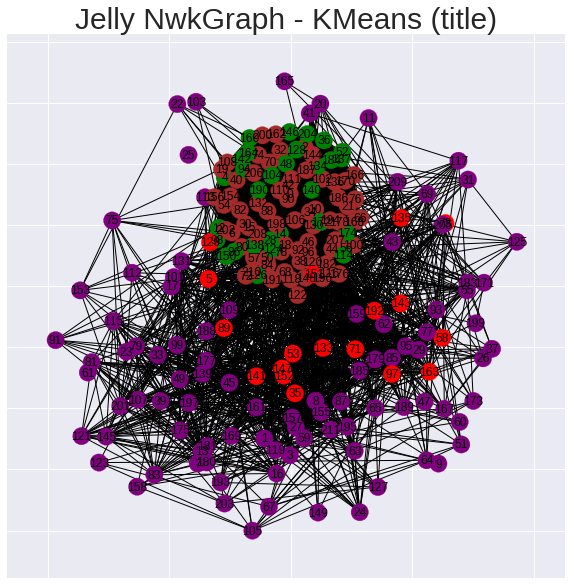

In [ ]:
# Get random colors
import random
colors = ["green","yellow","cyan","red","orange","brown","blue","magenta","purple","olive","gray","violet","lime"]
choosen_colors = random.sample(colors, k_cluster)
print("Colors Choosen are: ", choosen_colors)

color_map = []
for i in G.nodes:
  for j in range(len(KM_classes)):
    if(i in KM_classes[j]):
      color_map.append(choosen_colors[j])

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.6, iterations=20)
nx.draw_networkx(G, pos, node_color=color_map,with_labels=True)

plt.title(channel_name+ " NwkGraph - KMeans ("+FEA+")",fontsize=30)

plt.savefig(channel_name+ " NwkGraph - KMeans.jpg")
plt.show()

In [ ]:
all_Nodes = [i[0] for i in G.nodes(data=True)]
all_BOW  = [i[1]['BOW'] for i in G.nodes(data=True)]
all_View  = [i[1]['Views'] for i in G.nodes(data=True)]
all_Comm_KM = list(KM_Results)

csv_data = {}
csv_data["Node_Number"] = all_Nodes
csv_data["Bag of Word"] = all_BOW
csv_data["Views"] = all_View
csv_data["Community"] = all_Comm_KM

KM_DF = pd.DataFrame(csv_data)
KM_DF.to_csv(channel_name + ' - KM  Final ('+FEA+').csv')
KM_DF.head()

,Node_Number,Bag of Word,Views,Community
0,0,dig straight new minecraft update,56378,0
1,1,play happy wheel amaze,234008,3
2,2,attempt laser bedrock dropper minecraft,273716,0
3,3,finish without touch arrow ultimate chicken horse,243326,3
4,4,minecraft custom item,309534,2


In [ ]:
print("Time taken by KMeans: ",time_KMeans," seconds.")

Time taken by KMeans:  0.32688093185424805  seconds.


#### 1. Mean-Shift Clustering Algorithm

In [ ]:
import time
begin = time.time()

from sklearn.cluster import MeanShift

MS = MeanShift()
MS.fit(M)
MS_Results = MS.labels_
M_clusters = (len(np.unique(MS.labels_)))

MS_classes = [[] for i in range(M_clusters)]
for i in range(KM_Results.shape[0]):
  v = MS_Results[i]
  MS_classes[v].append(i)

for i in range(len(MS_classes)):
  print("Class ",i," -- ",MS_classes[i])

end = time.time()
time_MShift = end-begin

Class  0  --  [1, 3, 5, 7, 8, 9, 11, 13, 16, 17, 20, 22, 23, 24, 25, 26, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 58, 59, 60, 61, 62, 63, 64, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 112, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 139, 141, 143, 145, 147, 149, 152, 153, 155, 157, 158, 159, 161, 163, 165, 167, 169, 171, 173, 175, 176, 177, 179, 180, 181, 183, 185, 188, 189, 192, 193, 195, 197, 199, 201, 203, 205, 209, 211]
Class  1  --  [0, 2, 4, 6, 10, 12, 15, 18, 19, 21, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 57, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 111, 114, 116, 118, 120, 122, 124, 128, 130, 132, 134, 136, 138, 140, 142, 144, 148, 150, 151, 154, 156, 162, 164, 166, 168, 170, 172, 174, 178, 182, 184, 186, 187, 190, 191, 194, 196, 198, 200, 202, 206, 207, 208, 210]
Class  2  --  [126, 137, 146, 160, 204]
Class  3 

Colors Choosen are:  ['violet', 'brown', 'magenta', 'olive']


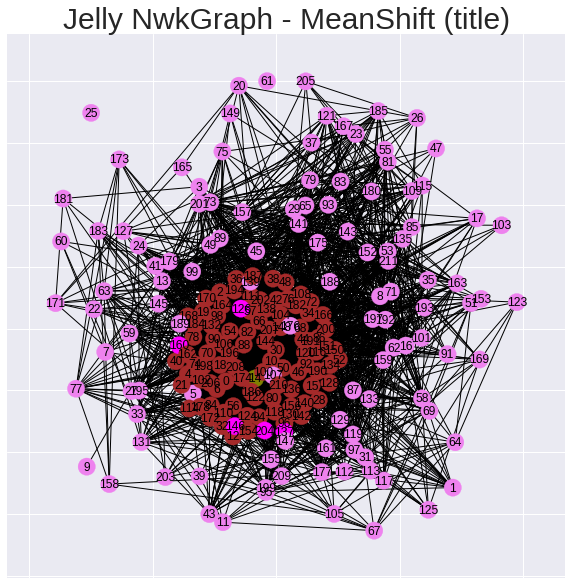

In [ ]:
# Get random colors
import random
colors = ["green","yellow","cyan","red","orange","brown","blue","magenta","purple","olive","gray","violet","lime"]
choosen_colors = random.sample(colors, M_clusters)
print("Colors Choosen are: ", choosen_colors)

color_map = []
for i in G.nodes:
  for j in range(len(MS_classes)):
    if(i in MS_classes[j]):
      color_map.append(choosen_colors[j])

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.6, iterations=20)
nx.draw_networkx(G, pos, node_color=color_map,with_labels=True)

plt.title(channel_name+ " NwkGraph - MeanShift ("+FEA+")",fontsize=30)

plt.savefig(channel_name+ " NwkGraph - MeanShift ("+FEA+").jpg")
plt.show()

In [ ]:
all_Nodes = [i[0] for i in G.nodes(data=True)]
all_BOW  = [i[1]['BOW'] for i in G.nodes(data=True)]
all_View  = [i[1]['Views'] for i in G.nodes(data=True)]
all_Comm_MS = list(MS_Results)

csv_data = {}
csv_data["Node_Number"] = all_Nodes
csv_data["Bag of Word"] = all_BOW
csv_data["Views"] = all_View
csv_data["Community"] = all_Comm_MS

KM_DF = pd.DataFrame(csv_data)
KM_DF.to_csv(channel_name + ' - MShift  Final ('+FEA+').csv')
KM_DF.head()

,Node_Number,Bag of Word,Views,Community
0,0,dig straight new minecraft update,56378,1
1,1,play happy wheel amaze,234008,0
2,2,attempt laser bedrock dropper minecraft,273716,1
3,3,finish without touch arrow ultimate chicken horse,243326,0
4,4,minecraft custom item,309534,1


In [ ]:
print("Time taken by Mean Shift: ",time_MShift," seconds.")

Time taken by Mean Shift:  0.5809874534606934  seconds.


#### 2. DBSCAN – Density-Based Spatial Clustering of Applications with Noise

In [ ]:
import time
begin = time.time()
from sklearn.cluster import DBSCAN

DBS = DBSCAN().fit(M)
DBS_Results = DBS.labels_
DBS_clusters = (len(np.unique(DBS.labels_)))

DBS_classes = [[] for i in range(DBS_clusters)]
for i in range(DBS_Results.shape[0]):
  v = DBS_Results[i]
  DBS_classes[v].append(i)

for i in range(len(DBS_classes)):
  print("Class ",i," -- ",DBS_classes[i])

end = time.time()
time_DBS = end-begin

Class  0  --  [9, 25, 61, 103, 149]
Class  1  --  [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211]


Colors Choosen are:  ['purple', 'brown']


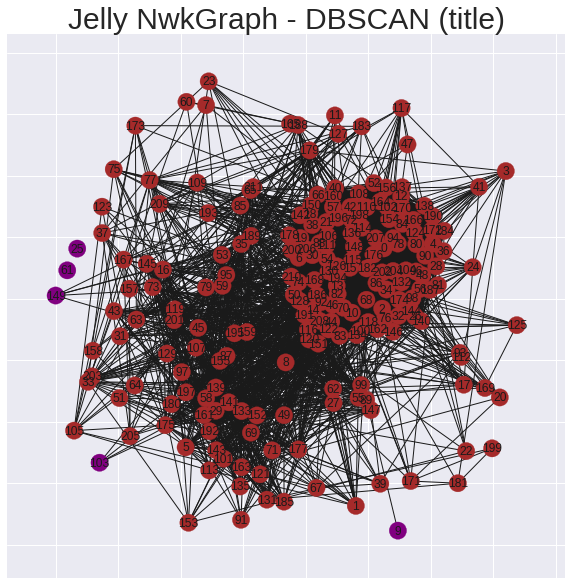

In [ ]:
# Get random colors
import random
plt.style.use('seaborn')
colors = ["green","yellow","cyan","red","orange","brown","blue","magenta","purple","olive","gray","violet","lime"]
choosen_colors = random.sample(colors, DBS_clusters)
print("Colors Choosen are: ", choosen_colors)

color_map = []
for i in G.nodes:
  for j in range(len(DBS_classes)):
    if(i in DBS_classes[j]):
      color_map.append(choosen_colors[j])

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.6, iterations=20)
nx.draw_networkx(G, pos, node_color=color_map,with_labels=True)

plt.title(channel_name+ " NwkGraph - DBSCAN ("+FEA+")",fontsize=30)

plt.savefig(channel_name+ " NwkGraph - DBSCAN ("+FEA+").jpg")
plt.show()

In [ ]:
all_Nodes = [i[0] for i in G.nodes(data=True)]
all_BOW  = [i[1]['BOW'] for i in G.nodes(data=True)]
all_View  = [i[1]['Views'] for i in G.nodes(data=True)]
all_Comm_DBS = list(DBS_Results)

csv_data = {}
csv_data["Node_Number"] = all_Nodes
csv_data["Bag of Word"] = all_BOW
csv_data["Views"] = all_View
csv_data["Community"] = all_Comm_DBS

KM_DF = pd.DataFrame(csv_data)
KM_DF.to_csv(channel_name + ' - DBSCAN  Final ('+FEA+').csv')
KM_DF.head()

,Node_Number,Bag of Word,Views,Community
0,0,dig straight new minecraft update,56378,-1
1,1,play happy wheel amaze,234008,-1
2,2,attempt laser bedrock dropper minecraft,273716,-1
3,3,finish without touch arrow ultimate chicken horse,243326,-1
4,4,minecraft custom item,309534,-1


In [ ]:
print("Time taken by DBSCAN: ",time_DBS," seconds.")

Time taken by DBSCAN:  0.00542140007019043  seconds.


#### 3. EM using GMM – Expectation-Maximization (EM) Clustering using Gaussian Mixture Models (GMM)

In [ ]:
import time
begin = time.time()
from sklearn.mixture import GaussianMixture

GM_clusters = 4
GM = GaussianMixture(n_components = GM_clusters)
GM.fit(M)
GM_Results = GM.predict(M)

GM_classes = [[] for i in range(GM_clusters)]
for i in range(GM_Results.shape[0]):
  v = GM_Results[i]
  GM_classes[v].append(i)

for i in range(len(GM_classes)):
  print("Class ",i," -- ",GM_classes[i])

end = time.time()
time_GM = end-begin

Class  0  --  [0, 2, 6, 10, 15, 18, 19, 21, 30, 32, 34, 38, 40, 42, 44, 46, 50, 54, 56, 57, 66, 72, 74, 76, 78, 82, 88, 90, 92, 96, 100, 102, 106, 108, 110, 111, 116, 118, 120, 122, 130, 132, 136, 144, 148, 154, 156, 162, 166, 168, 170, 176, 178, 182, 186, 187, 191, 194, 196, 198, 200, 202, 207, 208, 210]
Class  1  --  [1, 3, 7, 8, 9, 11, 13, 16, 17, 20, 22, 23, 24, 25, 26, 27, 29, 31, 33, 37, 39, 41, 43, 45, 47, 49, 51, 55, 59, 60, 61, 62, 63, 64, 65, 67, 69, 75, 77, 79, 81, 83, 85, 87, 91, 93, 95, 99, 101, 103, 105, 107, 109, 112, 113, 115, 117, 119, 121, 123, 125, 127, 131, 139, 145, 149, 153, 155, 157, 158, 159, 161, 165, 167, 169, 171, 173, 175, 177, 179, 180, 181, 183, 185, 188, 189, 193, 195, 197, 199, 201, 203, 205, 209, 211]
Class  2  --  [4, 12, 14, 28, 36, 48, 52, 68, 70, 80, 84, 86, 94, 98, 104, 114, 124, 126, 128, 134, 137, 138, 140, 142, 146, 150, 160, 164, 172, 174, 184, 190, 204, 206]
Class  3  --  [5, 35, 53, 58, 71, 73, 89, 97, 129, 133, 135, 141, 143, 147, 151, 152, 

Colors Choosen are:  ['olive', 'cyan', 'magenta', 'violet']


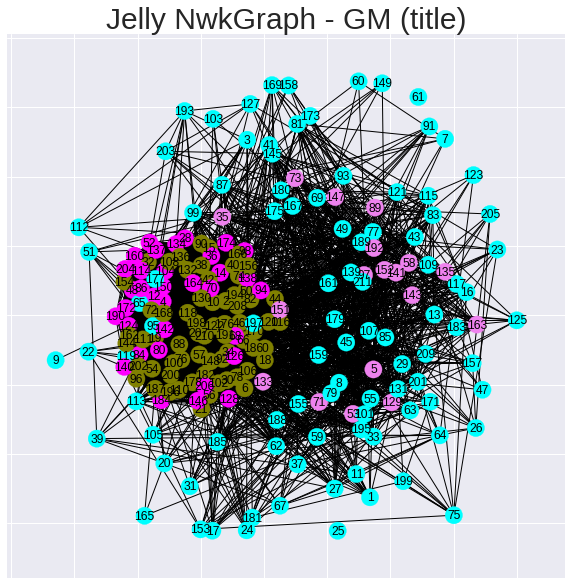

In [ ]:
# Get random colors
import random
colors = ["green","yellow","cyan","red","orange","brown","blue","magenta","purple","olive","gray","violet","lime"]
choosen_colors = random.sample(colors, GM_clusters)
print("Colors Choosen are: ", choosen_colors)

color_map = []
for i in G.nodes:
  for j in range(len(GM_classes)):
    if(i in GM_classes[j]):
      color_map.append(choosen_colors[j])

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.6, iterations=20)
nx.draw_networkx(G, pos, node_color=color_map,with_labels=True)

plt.title(channel_name+ " NwkGraph - GM ("+FEA+")",fontsize=30)

plt.savefig(channel_name+ " NwkGraph - GM ("+FEA+").jpg")
plt.show()

In [ ]:
print("Time taken by DBSCAN: ",time_GM," seconds.")

Time taken by DBSCAN:  0.14579463005065918  seconds.


In [ ]:
all_Nodes = [i[0] for i in G.nodes(data=True)]
all_BOW  = [i[1]['BOW'] for i in G.nodes(data=True)]
all_View  = [i[1]['Views'] for i in G.nodes(data=True)]
all_Comm_GM = list(GM_Results)

csv_data = {}
csv_data["Node_Number"] = all_Nodes
csv_data["Bag of Word"] = all_BOW
csv_data["Views"] = all_View
csv_data["Community"] = all_Comm_GM

GM_DF = pd.DataFrame(csv_data)
GM_DF.to_csv(channel_name + ' - GM  Final ('+FEA+').csv')
GM_DF.head()

,Node_Number,Bag of Word,Views,Community
0,0,dig straight new minecraft update,56378,0
1,1,play happy wheel amaze,234008,1
2,2,attempt laser bedrock dropper minecraft,273716,0
3,3,finish without touch arrow ultimate chicken horse,243326,1
4,4,minecraft custom item,309534,2


### Create Box Plots, Strip Plot and Violin Plot

---



---



#### 1. K-Means

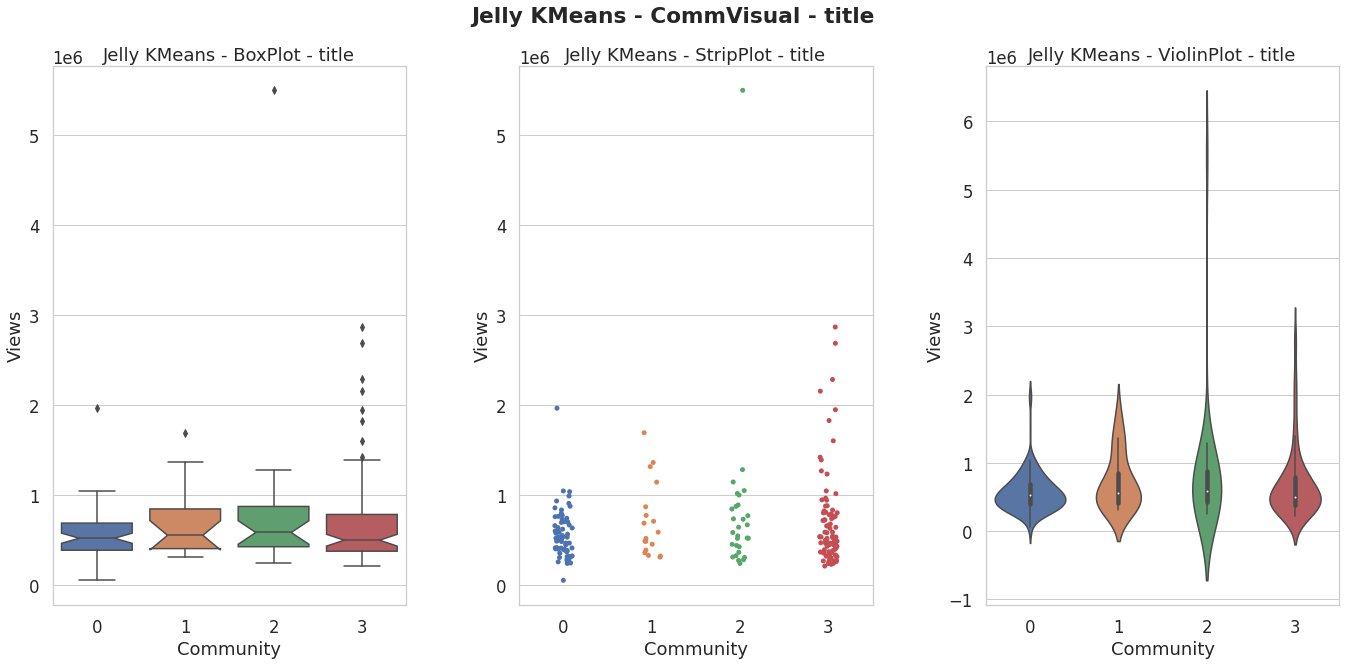

In [ ]:
LD_KM = pd.read_csv(channel_name + ' - KM  Final ('+FEA+').csv')
LD_KM = LD_KM.loc[:, ~LD_KM.columns.str.contains('^Unnamed')]
LD_KM.head()

import seaborn as sns
sns.set(rc={'figure.figsize':(11,11)}, font_scale=1.5, style='whitegrid')

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
KM_BP = sns.boxplot(x='Community',y='Views',data=LD_KM,notch=True).set_title(channel_name + ' KMeans - BoxPlot - '+ FEA)

plt.subplot(1,3,2)
KM_SP = ax = sns.stripplot(x="Community", y="Views",data=LD_KM).set_title(channel_name + ' KMeans - StripPlot - '+ FEA)

plt.subplot(1,3,3)
KM_VP = ax = sns.violinplot(x="Community", y="Views",data=LD_KM).set_title(channel_name + ' KMeans - ViolinPlot - '+ FEA)

plt.suptitle(channel_name + " KMeans - CommVisual - "+FEA,fontweight ="bold")
plt.tight_layout(pad=3)

plt.savefig(channel_name + " KMeans - CommVisual - "+FEA+".jpg")

#### 2. Mean-Shift Clustering Algorithm

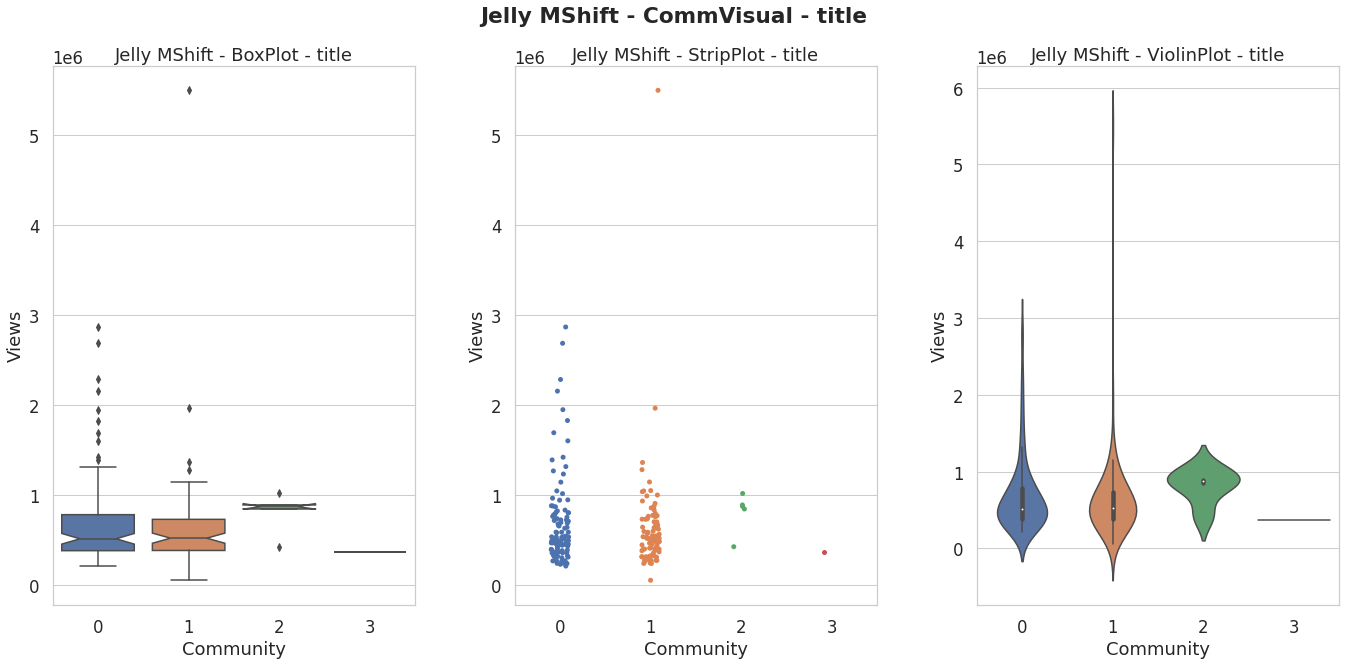

In [ ]:
LD_MShift = pd.read_csv(channel_name + ' - MShift  Final ('+FEA+').csv')
LD_MShift = LD_MShift.loc[:, ~LD_MShift.columns.str.contains('^Unnamed')]
LD_MShift.head()

import seaborn as sns
sns.set(rc={'figure.figsize':(11,11)}, font_scale=1.5, style='whitegrid')

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
MShift_BP = sns.boxplot(x='Community',y='Views',data=LD_MShift,notch=True).set_title(channel_name + ' MShift - BoxPlot - '+ FEA)

plt.subplot(1,3,2)
MShift_SP = ax = sns.stripplot(x="Community", y="Views",data=LD_MShift).set_title(channel_name + ' MShift - StripPlot - '+ FEA)

plt.subplot(1,3,3)
MShift_VP = ax = sns.violinplot(x="Community", y="Views",data=LD_MShift).set_title(channel_name + ' MShift - ViolinPlot - '+ FEA)

plt.suptitle(channel_name + " MShift - CommVisual - "+FEA,fontweight ="bold")
plt.tight_layout(pad=3)

plt.savefig(channel_name + " MShift - CommVisual - "+FEA+".jpg")

#### 3.  DBSCAN – Density-Based Spatial Clustering of Applications with Noise

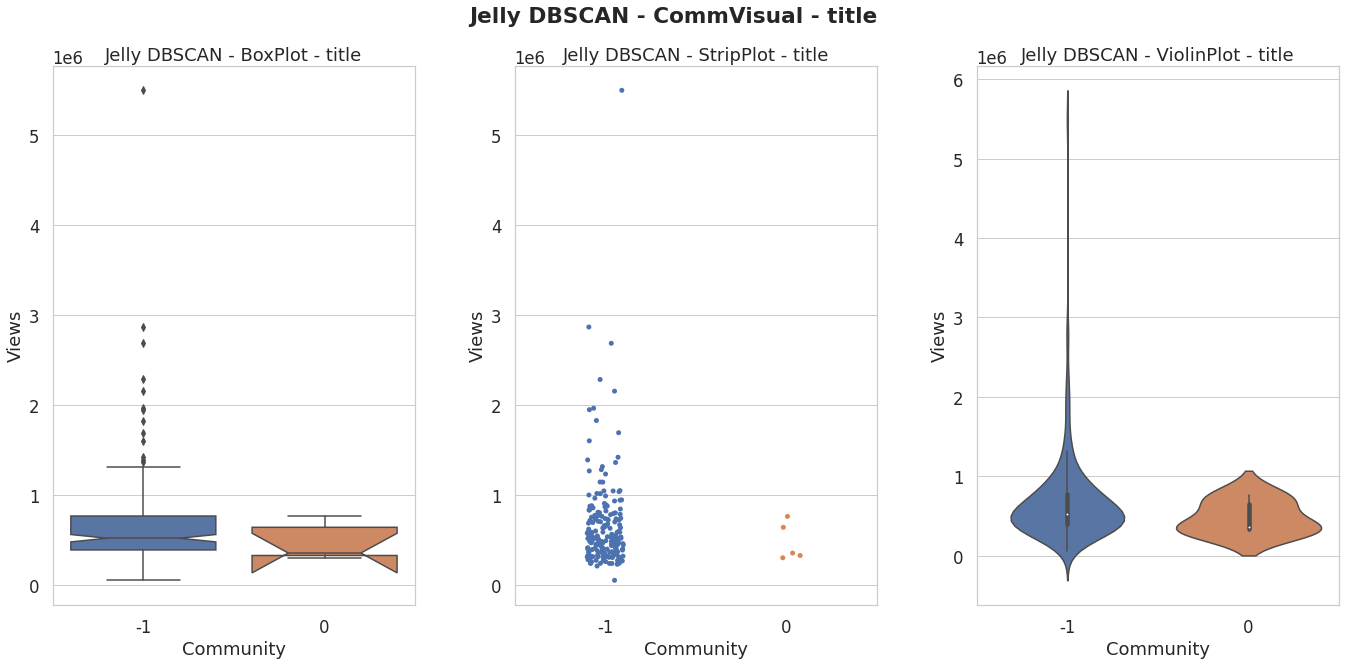

In [ ]:
LD_DBSCAN = pd.read_csv(channel_name + ' - DBSCAN  Final ('+FEA+').csv')
LD_DBSCAN = LD_DBSCAN.loc[:, ~LD_DBSCAN.columns.str.contains('^Unnamed')]
LD_DBSCAN.head()

import seaborn as sns
sns.set(rc={'figure.figsize':(11,11)}, font_scale=1.5, style='whitegrid')

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
DBSCAN_BP = sns.boxplot(x='Community',y='Views',data=LD_DBSCAN,notch=True).set_title(channel_name + ' DBSCAN - BoxPlot - '+ FEA)

plt.subplot(1,3,2)
DBSCAN_SP = ax = sns.stripplot(x="Community", y="Views",data=LD_DBSCAN).set_title(channel_name + ' DBSCAN - StripPlot - '+ FEA)

plt.subplot(1,3,3)
DBSCAN_VP = ax = sns.violinplot(x="Community", y="Views",data=LD_DBSCAN).set_title(channel_name + ' DBSCAN - ViolinPlot - '+ FEA)

plt.suptitle(channel_name + " DBSCAN - CommVisual - "+FEA,fontweight ="bold")
plt.tight_layout(pad=3)

plt.savefig(channel_name + " DBSCAN - CommVisual - "+FEA+".jpg")

#### 4. EM using GMM – Expectation-Maximization (EM) Clustering using Gaussian Mixture Models (GMM)

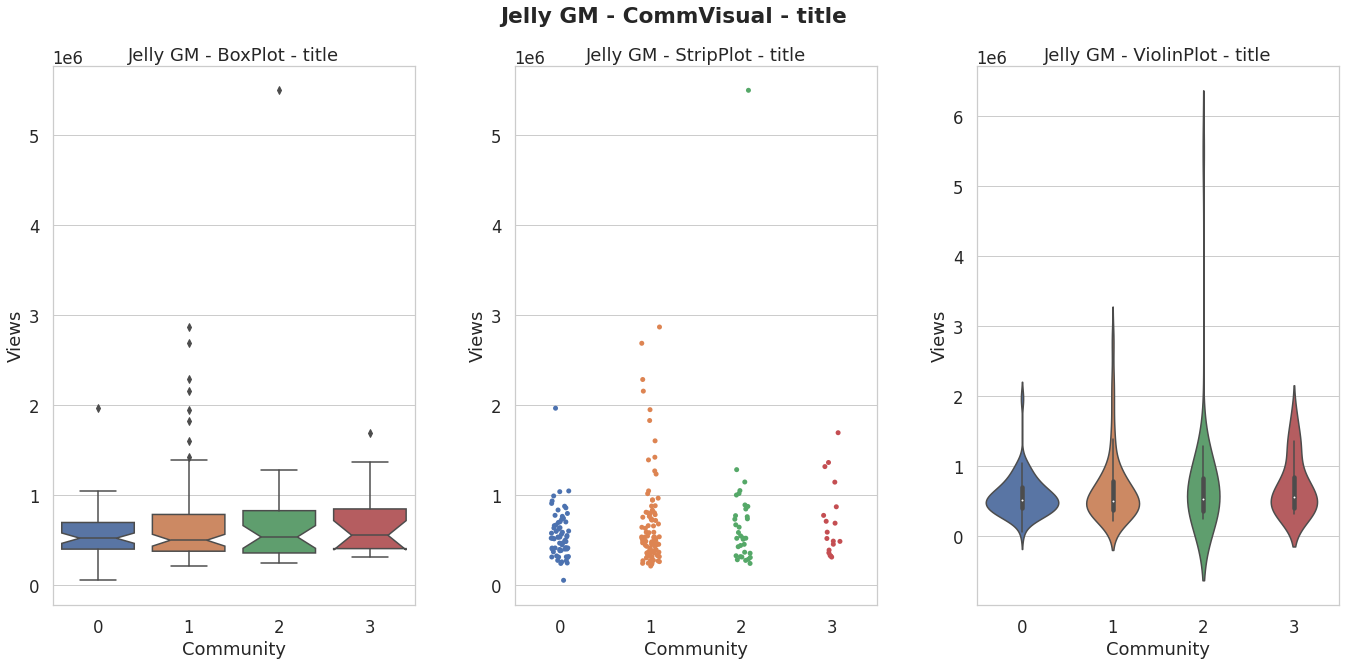

In [ ]:
LD_GM = pd.read_csv(channel_name + ' - GM  Final ('+FEA+').csv')
LD_GM = LD_GM.loc[:, ~LD_GM.columns.str.contains('^Unnamed')]
LD_GM.head()

import seaborn as sns
sns.set(rc={'figure.figsize':(11,11)}, font_scale=1.5, style='whitegrid')

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
AHC_BP = sns.boxplot(x='Community',y='Views',data=LD_GM,notch=True).set_title(channel_name + ' GM - BoxPlot - '+ FEA)

plt.subplot(1,3,2)
AHC_SP = ax = sns.stripplot(x="Community", y="Views",data=LD_GM).set_title(channel_name + ' GM - StripPlot - '+ FEA)

plt.subplot(1,3,3)
AHC_VP = ax = sns.violinplot(x="Community", y="Views",data=LD_GM).set_title(channel_name + ' GM - ViolinPlot - '+ FEA)

plt.suptitle(channel_name + " GM - CommVisual - "+FEA,fontweight ="bold")
plt.tight_layout(pad=3)

plt.savefig(channel_name + " GM - CommVisual - "+FEA+".jpg")

### Analyse all the Clustering Algorithms

---



---



In [ ]:
Analyse_all_data = {}

Analyse_all_data["Name of Algo"] = ["K-Means","Mean-Shift","DBSCAN","EM using GMM"]

all_time_taken = []
all_time_taken.append(time_KMeans)
all_time_taken.append(time_MShift)
all_time_taken.append(time_DBS)
all_time_taken.append(time_GM)
Analyse_all_data["Time Taken"] = all_time_taken

all_no_comm = []
all_no_comm.append(k_cluster)
all_no_comm.append(M_clusters)
all_no_comm.append(DBS_clusters)
all_no_comm.append(GM_clusters)
Analyse_all_data["No of Communities"] = all_no_comm


Final_Analyse_Data = pd.DataFrame(Analyse_all_data)
Final_Analyse_Data.to_csv(channel_name + ' - Algorithm Analysis - 1 ('+FEA+').csv')
Final_Analyse_Data

,Name of Algo,Time Taken,No of Communities
0,K-Means,0.326881,4
1,Mean-Shift,0.580987,4
2,DBSCAN,0.005421,2
3,EM using GMM,0.145795,4


### Putting Everything in one .zip folder

---



---



In [ ]:
from zipfile import ZipFile
import os
files = os.listdir(os.curdir)

zipObj = ZipFile(channel_name + "- "+FEA+ '.zip', 'w')
for i in files:
  if(i.startswith(channel_name)):
    zipObj.write(i)
zipObj.close()

In [ ]:
from google.colab import files
files.download(channel_name + "- "+FEA+ '.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Clean the whole folder


In [ ]:
import os
files = os.listdir(os.curdir)
for i in files:
  if(i==".config" or i=="sample_data"):
    pass
  else:
    os.remove(i)